# Probability - Coin Flips and Experiments 

In [28]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html

In [29]:
np.random.uniform(low=0.0, high=1.0)  

0.4579448956254042

In [30]:
# generate a 'flip'
def flip(num = 1):
    flips = [] 
    
    for i in range(num): 
        num = np.random.uniform(low=0.0, high=1.0)      
        if num > 0.75: 
            flips.append('H')             # should be doing yield here if you know 'generators'
        else: 
            flips.append('T')
    return flips

In [31]:
flip()

['T']

In [32]:
flips = flip(10) 
print(flips)

['T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H']


In [33]:
values, counts = np.unique(flips, return_counts=True)

In [34]:
values, counts

(array(['H', 'T'], dtype='<U1'), array([3, 7]))

## Repdoducible 'Randomness' 

In [35]:
# computers are 'deterministic'. You can not do 'random' in computers! 
# So, you start with some 'seed' then do deterministic things 
# this is called pseudo-randomness 

# sometimes you want to suppress this! 

np.random.seed(0)   # random numbers and seed 

In [36]:
np.random.uniform(low=0.0, high=1.0)  

0.5488135039273248

In [37]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html


np.random.seed(1337)   # random numbers and seed 


# generate a 'flip'
def flip(num = 1):
    flips = [] 
    
    for i in range(num): 
        num = np.random.uniform(low=0.0, high=1.0)      
        if num > 0.75: 
            flips.append('H')             # should be doing yield here if you know 'generators'
        else: 
            flips.append('T')
    return flips


# Flip 
flips = flip(10) 
values, counts = np.unique(flips, return_counts=True)

# print values/stats
# print(flip())
print(flips)
print(values, counts)

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T']
['H' 'T'] [1 9]


## Probability of Flips 

In [38]:
from collections import Counter, defaultdict 


def get_freqs(flips): 
    keys = Counter(flips).keys()
    vals = Counter(flips).values()  
    
    # print(keys)
    # print(vals) 
    
    # return dict(zip(keys, vals))     # bug: what if there are no 'H' or no 'T'

    return defaultdict(int, dict(zip(keys, vals)))

In [39]:
freqs = get_freqs(flips)
print(freqs)

defaultdict(<class 'int'>, {'T': 9, 'H': 1})


In [40]:
prob_h = freqs['H'] / len(flips)
print(prob_h)

0.1


## Experiment: Prob calculated based on 1 flip upto N flips 

In [41]:
maximum_flips = 1000

probs = [] 
for num_flips in range(1, maximum_flips):
    flips = flip(num_flips)
    freqs = get_freqs(flips)
    prob_h = freqs['H'] / len(flips)

    probs.append(prob_h)
    
# print(probs)

In [42]:
print(freqs)

defaultdict(<class 'int'>, {'T': 740, 'H': 259})


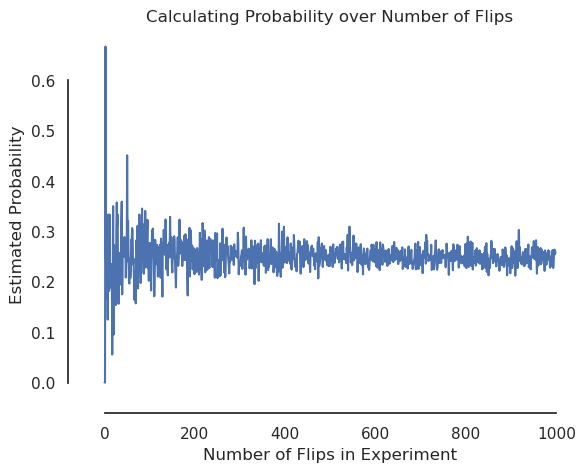

In [43]:
plt.plot(probs)
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

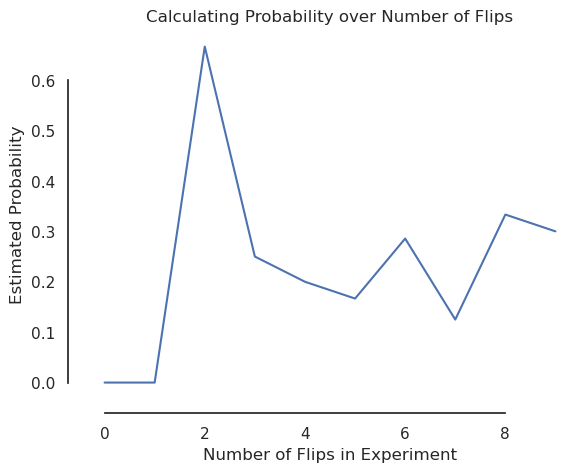

In [44]:
plt.plot(probs[:10])
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

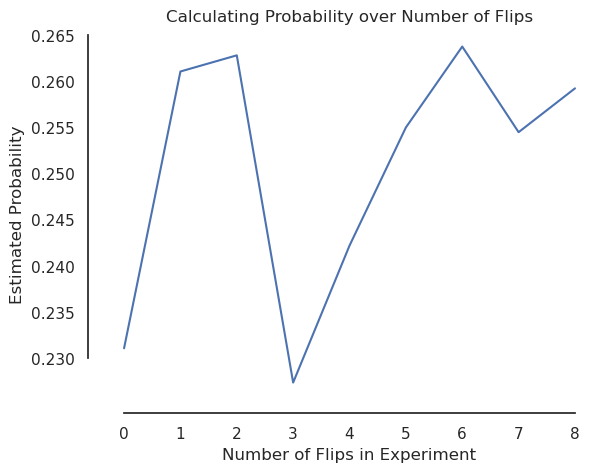

In [45]:
plt.plot(probs[maximum_flips-10:])
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away 
plt.show()

In [46]:
%pip install bokeh

Note: you may need to restart the kernel to use updated packages.


## Bokeh For Interactive Plots 

In [47]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [48]:
p = figure(title="Simple Line Plot in Bokeh", 
           x_axis_label='Number of Flips in Experiment', 
           y_axis_label='Estimated Probability', 
           width=580, height=380)

In [49]:
# Add a line renderer with legend and line thickness
x = list(range(1, maximum_flips))
p.line(x=x, y=probs)

# Show the results
show(p)